![example](images/director_shot.jpeg)

# MICROSOFT MOVIE STUDIO MARKET RESEARCH

**Authors:** Winfred Kabuya
***

## Overview

This project aims to provide recommendations to Microsoft regarding the types of movies that perform well among audiences, using data analysis of movie ratings and popularity. Microsoft plans to launch its own movie studio and has requested guidance as a newcomer to the industry. The project utilizes datasets from various sources, such as Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers. The primary focus of the analysis is the IMDb datasets, which include movie information from 2010 to 2019, such as genres, average user ratings, and the number of users who voted on each movie. The analysis resulted in identifying 10 high-performing genres for Microsoft to prioritize and providing recommendations on how much of its budget should be allocated to Action movies and animated movies.

## Business Problem

When measuring success in the movie industry, it may not be sufficient to only consider the attributes that generate the highest return-on-investment at the box office, especially in the streaming era. Rather, the number of people who watch the movie should be the primary measure of success. As Microsoft considers whether to sell its movies to streaming services or launch its own, it needs to determine which types of movies will attract the most viewers. To gauge this, I use the number of votes a movie receives on IMDb as a proxy for the number of viewers. By analyzing this metric, I aim to answer the following questions: which 5 genres typically perform the best, and how much focus should Microsoft place on producing comedies and action movies?

## Data Understanding

IMDb is a highly popular website for obtaining basic information on movies and TV shows, including user reviews.As of March 2022, the database contained some 10.1 million titles (including television episodes) and 11.5 million person records. Additionally, the site had 83 million registered users and is the 54th most visited website in the world, according to website ranker Alexa as of February 12, 2023.

The data that I will be working with is stored in a SQL file and contains two main tables: movie_basics and movie_ratings. The movie_basics table provides details on each movie's name, release year, runtime, and genres, while the movie_ratings table presents the total number of votes a movie has received and its rank based on those votes.

Both tables share a unique identifier for each movie called movie_id. To analyze the data, I intend to group the movies by genre and determine the number one ranked movie for each genre based on its total number of votes.

In [6]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile
%matplotlib inline

In [7]:
# Here you run your code to explore the data
#Loading the zipped file
with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')

In [8]:
con = sqlite3.connect('ZippedData/im.db')


In [9]:
! ls zippedData


bom.movie_gross.csv.gz	rt.movie_info.tsv.gz  tmdb.movies.csv.gz
im.db.zip		rt.reviews.tsv.gz     tn.movie_budgets.csv.gz


## Data Preparation

Investigating the IMDb SQL database.

In [10]:
# Here you run your code to clean the data
pd.read_sql("""
SELECT *
FROM sqlite_schema
WHERE type='table'
""", con)


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Merging IMDb movie_basics and movie_ratings 

In [11]:
movies_ratings = pd.read_sql("""
SELECT * FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
""" , con)

movies_ratings 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [12]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [13]:
# Calculating the number of missing/null values

movies_ratings.isna().sum()


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

We now need to drop these missing values

In [14]:
# Dropping titles with no votes or rating

movies_ratings.dropna(subset=['numvotes'], inplace=True)

In [15]:
#to confirm if they were dropped
print('Number of null ratings:', movies_ratings['averagerating'].isnull().sum())

print('Number of null vote counts:', movies_ratings['numvotes'].isnull().sum())


Number of null ratings: 0
Number of null vote counts: 0


In [16]:
# Dropping titles with no genres listed.

movies_ratings.dropna(subset=['genres'], inplace=True)

Lets deal with the duplicates

In [17]:
movies_ratings.duplicated().sum()

0

In [18]:
movies_ratings.duplicated(subset='original_title').sum()

2707

While there are over 2,700 movies that share the same name, it doesn't necessarily mean that they are exact duplicates of one another. There is a possibility that it could be a mere coincidence. To investigate further, let's check if there are any movies that have identical titles, runtimes, and release years.

In [19]:
movies_ratings[movies_ratings.duplicated(subset=['original_title', 'runtime_minutes', 'start_year'])]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2658,tt10275936,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary,6.9,47.0
11830,tt1644694,The Gift,The Gift,2010,NaN,"Animation,Drama",5.9,7.0
12984,tt1674217,Transit,Transit,2010,80.0,"Biography,Documentary,Family",6.7,13.0
19111,tt1825978,The Artist,The Artist,2011,100.0,Thriller,6.8,6.0
23887,tt1967651,Unconditional Love,Unconditional,2012,92.0,"Drama,Thriller",5.6,660.0
24139,tt1977822,Inside,Inside,2012,85.0,Horror,4.0,397.0
33380,tt2246595,Blood Money,Blood Money,2012,109.0,"Action,Drama,Thriller",5.2,881.0
37698,tt2363471,The Summit,The Summit,2012,95.0,"Adventure,Documentary",6.9,4147.0
47280,tt2805202,Rise of the Undead,Rise of the Undead,2013,70.0,Action,4.2,20.0
50941,tt3019098,The Last Act,The Last Act,2012,NaN,Thriller,5.7,6.0


Eliminating duplicate entries is important. However, we should retain the version with the highest number of votes, as it is the one that IMDb users are more likely to experience.

In [20]:
# Sorting the dataset by vote count

movies_ratings.sort_values(by='numvotes', ascending=False, inplace=True)

In [21]:
# Dropping the duplicates

movies_ratings.drop_duplicates(subset=['original_title', 'runtime_minutes', 'start_year'], inplace=True, keep='first')

In [22]:
movies_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0


Regarding the genres column:

The genres column in the dataset consists of multiple genres separated by a comma. Therefore, it is necessary to split them up for ease of analysis.

One way to separate the genres is by using the df.explode() method. However, to do this, it is first required to convert the value from a string to a list.


In [23]:
# Creating a new dataframe

clean_genres = movies_ratings.copy()

In [24]:
# Changing each entry in 'genres' from a string into a list

clean_genres['genres'] = clean_genres['genres'].str.split(',')

In [25]:
clean_genres.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"[Action, Thriller]",8.4,1387769.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"[Adventure, Drama, Sci-Fi]",8.6,1299334.0
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"[Drama, Western]",8.4,1211405.0
356,tt0848228,The Avengers,The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655.0


In [26]:
# Creating a list of all unique genres, now that we can iterate through them.

genres_all = set()
genres_column = clean_genres['genres']

for glist in genres_column:
    for g in glist:
        genres_all.add(g)
        

In [27]:
print(f'There are {len(genres_all)} genres in our IMDb dataset. They are:\n\n {genres_all}.')

There are 26 genres in our IMDb dataset. They are:

 {'Mystery', 'Musical', 'Fantasy', 'Short', 'Action', 'Family', 'Comedy', 'Animation', 'Western', 'Sci-Fi', 'Thriller', 'Sport', 'News', 'Crime', 'Romance', 'War', 'Adventure', 'Music', 'Documentary', 'Reality-TV', 'Horror', 'Biography', 'Adult', 'Game-Show', 'History', 'Drama'}.


**Creating a new dataset where the genres are separated**

In [28]:
# Using df.explode() to split each row so that it has a singular genre.

expl_clean_genres = clean_genres.explode('genres')
expl_clean_genres.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,Action,8.8,1841066.0
7066,tt1375666,Inception,Inception,2010,148.0,Adventure,8.8,1841066.0
7066,tt1375666,Inception,Inception,2010,148.0,Sci-Fi,8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,8.4,1387769.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Thriller,8.4,1387769.0


In [29]:
expl_clean_genres['genres'].value_counts()

Drama          30784
Documentary    17748
Comedy         17289
Thriller        8212
Horror          7672
Action          6986
Romance         6586
Crime           4610
Adventure       3817
Biography       3807
Family          3411
Mystery         3038
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1967
Animation       1742
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

To ensure more accurate results when calculating the average numvotes and averagerating by genre, it is advisable to eliminate four genres that have low counts and are not considered traditional movie genres. These genres are Reality-TV, Adult, Game-Show, and Short.

In [30]:
# Gathering together the 'movie_id' for each entry in these four genres.

titles_in_noisy_genres = (expl_clean_genres[expl_clean_genres['genres'].isin(['Game-Show', 'Short', 'Adult','Reality-TV'])]['movie_id'])

In [31]:

#lets use df.drop() to get rid of the entries with the genres listed above
# clean_genres.drop(index=clean_genres[clean_genres['movie_id'].isin(titles_in_noisy_genres)].index)

for dataset in [clean_genres, expl_clean_genres, movies_ratings]:
    dataset.drop(
        index=dataset[
            dataset['movie_id'].isin(titles_in_noisy_genres)
        ].index, 
        inplace=True)

In [32]:
# Confirming that this worked
expl_clean_genres['genres'].value_counts()

Drama          30779
Documentary    17738
Comedy         17285
Thriller        8211
Horror          7671
Action          6984
Romance         6586
Crime           4610
Adventure       3815
Biography       3806
Family          3411
Mystery         3038
History         2824
Sci-Fi          2206
Fantasy         2126
Music           1966
Animation       1742
Sport           1179
War              853
Musical          721
News             578
Western          280
Name: genres, dtype: int64

**Assessing the Achievements**

To gauge a movie's triumph, I intend to rely on its rating and the number of votes it has received. In the current era of streaming, these factors can serve as more reliable indicators of a movie's popularity than its box office returns.

Additionally, I aim to investigate the correlation between a movie's vote count and its average rating. It's important to note that high vote count doesn't necessarily imply a positive reception, and therefore, I plan to analyze the distributions of both average rating and vote count.

In [36]:
# exploring the distributions of averagerating and numvotes.
mean_votes = movies_ratings['numvotes'].mean()
mean_votes

3564.0968895098

In [38]:
median_votes = movies_ratings['numvotes'].median()
median_votes

51.0

In [39]:
q90_votes = movies_ratings['numvotes'].quantile(.90)
q90_votes

1621.0

In [40]:
# Taking a look at the bottom 90 percent of movies in terms of number of votes
 
movies_ratings.query(f"numvotes < {q90_votes}").sample(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7154,tt1385633,The Runway,The Runway,2010,101.0,Comedy,6.6,555.0
5562,tt1095399,Love in Transit,Amor en tránsito,2010,95.0,Comedy,6.0,64.0
96587,tt5637348,Indonesia Kirana,Indonesia Kirana,2016,90.0,Documentary,9.4,70.0
22869,tt1935740,Autistic Driving School,Autistic Driving School,2010,NaN,Documentary,5.2,9.0
7498,tt1426748,Losers Take All,Losers Take All,2011,96.0,Comedy,6.5,318.0
56571,tt3307320,Woman of the Ruins,Woman of the Ruins,2013,105.0,"Drama,History,Sci-Fi",6.4,5.0
34585,tt2279377,Veronika,Veronika,2011,7.0,"Animation,Biography,Documentary",7.8,6.0
116688,tt6940692,Udhaharanam Sujatha,Udhaharanam Sujatha,2017,127.0,"Drama,Family",7.3,370.0
6414,tt1294789,Doomsday County,Doomsday County,2010,82.0,Horror,4.2,57.0
113511,tt6686930,A Yangtze Landscape,A Yangtze Landscape,2017,156.0,Documentary,6.7,11.0


In the film industry, a vast amount of content is produced, but only a few become popular among viewers. Therefore, to ensure our analysis focuses on the most well-known movies, we will filter out less popular titles. This is especially important for a client such as Microsoft, whom would prefer to base their movie business on titles with broad appeal or at least high recognition.

To achieve this, we will exclude all movies from our datasets, except those with a vote count that falls within the top 10 percent.

In [41]:
# lets drop these titles from our dataset
for dataset in [
    clean_genres, 
    expl_clean_genres,
    movies_ratings
]:
    dataset.drop(
        index=dataset.query(f"numvotes < {q90_votes}").index, 
        inplace=True
    )

In [43]:
movies_ratings.shape

(7304, 8)

Let's explore the correlation between the number of votes and ratings for movies.

In [44]:
# Checking the correlation coefficient of average rating and number of votes
print('Correlation between number of votes and average rating: {}'.format(np.corrcoef(movies_ratings['numvotes'],movies_ratings['averagerating'])[0,1]))


Correlation between number of votes and average rating: 0.21260637339137484


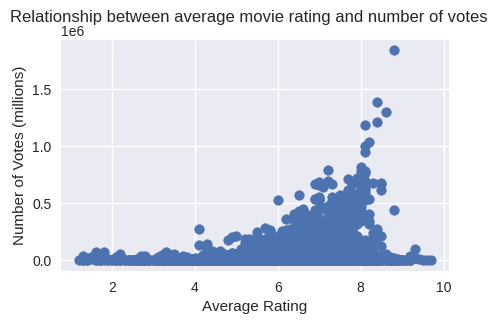

In [46]:
# Plotting the relationship between average rating and number of votes

fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(
    x=movies_ratings['averagerating'],
    y=movies_ratings['numvotes'],
)

ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of Votes (millions)')
plt.suptitle('Relationship between average movie rating and number of votes')

plt.savefig('./images/scatter-votes-rating.png', dpi=150);



The data suggests a positive correlation between the number of votes and the average rating. This indicates that a higher number of votes could mean a larger audience for the movie, regardless of the actual rating they gave. Based on this, it can be inferred that Microsoft would want to produce movies that are more likely to be seen by a wider audience, regardless of critical acclaim.

Therefore, we will consider the number of votes as our measure of success. Additionally, since the data distributions are skewed, we will use the median to represent the average rating. This approach will help ensure that our results are not skewed by any outliers.


Question 1:
What are the top 5 genres Microsoft should focus on?

Grouping movies by genre tosee the medians of numvotes for each genre

In [47]:
# Pivot table showing the average of numvotes by genre.

pivot_genres = pd.pivot_table(
    data=expl_clean_genres,
    values=['numvotes'],
    index='genres',
    aggfunc=np.median
).sort_values(by='numvotes', ascending=False).reset_index()

pivot_genres

,genres,numvotes
0,Adventure,16484.0
1,Fantasy,10546.0
2,Sci-Fi,10067.0
3,Animation,9354.0
4,Mystery,8494.0
5,Western,8284.5
6,Action,7543.5
7,Crime,7414.0
8,Biography,6560.0
9,Romance,6540.5


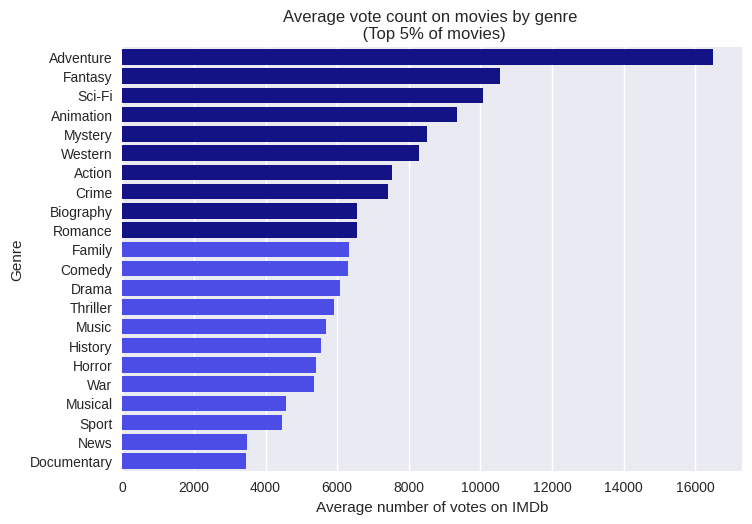

In [48]:
#analyze which genres are most successful.

values = pivot_genres['numvotes']
labels = pivot_genres['genres']

genres_barplot = sns.barplot(
    x=values,
    y=labels,
    orient='h',
#     palette='crest_r'
    palette=['#000099' if (x > values[10]) else '#3333ff' for x in values]
    )

genres_barplot.set(
    xlabel='Average number of votes on IMDb',
    ylabel='Genre',
    title ='Average vote count on movies by genre \n (Top 5% of movies)'
    );

plt.savefig('./images/top_genres', dpi=150)

In [51]:
print('The top 5 genres in terms of average number of votes on IMDb are:')
for g in pivot_genres.iloc[:5]['genres']:
    print(g)



The top 5 genres in terms of average number of votes on IMDb are:
Adventure
Fantasy
Sci-Fi
Animation
Mystery


In conclusion, it's advisable for Microsoft to concentrate on producing movies that encompass a blend of these genres:
-Adventure
-Fantasy
-Sci-Fi
-Animation
-Mystery
However it is worth noting that a movie belonging to multiple genres, such as a sci-fi comedy, may also perform well on IMDb.



\Although comedy didn't make it to the list of top-performing genres based on our statistical analysis, it's still worth exploring the characteristics of successful comedies.

Since our dataset is now limited to the top 10% of movies, let's examine how many of them fall under the comedy genre. Moving forward, we will be using our clean_genres dataset.

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***